# Rule-RAG: Enhancing Question Answering with Rule-Based Guidance





Rule-RAG is an innovative framework that enhances question answering systems by incorporating rule-based guidance into Retrieval-Augmented Generation (RAG). This approach allows the system to retrieve documents that are logically relevant to user queries using predefined rules, ensuring that the answers generated are accurate and contextually appropriate. By integrating in-context learning (ICL) and a fine-tuned version (FT), Rule-RAG improves both retrieval and generation processes, making it particularly effective for tasks requiring logical reasoning or domain-specific knowledge.



## Key Features of Rule-RAG



- **Rule-Guided Retrieval**: The system first retrieves relevant information from a knowledge base guided by logical rules or principles associated with the query. This ensures that the system accesses the necessary background knowledge to reason about the question effectively.

- **Guided Answer Generation**: The retrieved documents are then used to guide the generation of answers, blending retrieved knowledge with language model-based generation to produce grounded responses.

- **In-Context Learning (ICL)**: Rule-RAG employs ICL techniques, allowing the model to learn from examples of how rules apply to specific queries, enhancing its reasoning capabilities.

- **Fine-Tuned Version (FT)**: The fine-tuned variant of Rule-RAG further optimizes the retrieval and generation processes, improving performance on rule-aware question answering tasks.



## How Rule-RAG Works



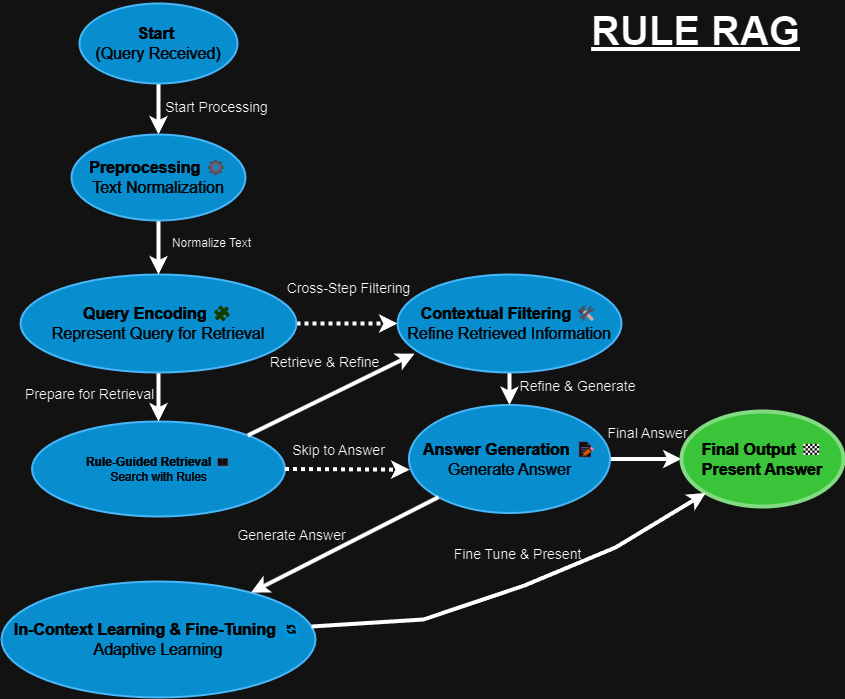

1. **Query Processing**:
   - When a user submits a query, the system first encodes both the query and any associated rules into a format suitable for retrieval.
   - This encoding helps ensure that the retrieval process is aligned with logical principles relevant to the question.

2. **Rule-Guided Retrieval**:
   - The encoded query is used to search a knowledge base for relevant passages guided by the predefined rules.
   - This step ensures that the retrieved information is contextually appropriate and supports logical reasoning.

3. **Answer Generation**:
   - The retrieved passages are fed into a language model along with the original query.
   - The model generates an answer while attending to both the query and the relevant retrieved information, ensuring accuracy and contextual relevance.

4. **In-Context Learning and Fine-Tuning**:
   - ICL techniques allow the model to adaptively learn how to apply rules based on examples provided during training.
   - The fine-tuned version further refines this process by optimizing retrieval strategies based on feedback from previous interactions.

5. **Final Output Delivery**:
   - The final answer is generated and presented to the user, grounded in both logical reasoning and factual information retrieved from the knowledge base.



In [ ]:
!pip install pypdf2 groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 7.3 MB/s eta 0:00:00


In [ ]:
import os
import requests
from PyPDF2 import PdfReader
from groq import Groq
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Step 0: Set up the Groq client
client = Groq(api_key="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")

In [ ]:
# Step 1: Download and Read the PDF (Assuming this PDF has information on Masked Language Models)
pdf_url = "https://arxiv.org/pdf/1810.04805.pdf"  # Example: BERT paper explaining Masked Language Models
pdf_path = "BERT_paper.pdf"

In [ ]:
response = requests.get(pdf_url)
with open(pdf_path, 'wb') as pdf_file:
    pdf_file.write(response.content)

In [ ]:
reader = PdfReader(pdf_path)
text = ""
for page in reader.pages:
    text += page.extract_text()

In [ ]:
# Step 2: Query Processing - Encode Query and Rules
query = "What is a masked language model?"
rules = ["The model must understand the context of missing words.",
         "The retrieval process needs to focus on semantic understanding."]

In [ ]:
# Encoding query and rules into a retrieval-friendly format
encoded_query = f"Query: {query} | Rules: {', '.join(rules)}"
print(f"Encoded query and rules: {encoded_query}")

Encoded query and rules: Query: What is a masked language model? | Rules: The model must understand the context of missing words., The retrieval process needs to focus on semantic understanding.


In [ ]:
# Step 3: Rule-Guided Retrieval
# Simulate retrieving relevant passages based on the query and the logical rules
vectorizer = TfidfVectorizer()
chunks = [text[i:i + 1000] for i in range(0, len(text), 1000)]  # Chunking the text
chunk_embeddings = vectorizer.fit_transform(chunks)
encoded_query_embedding = vectorizer.transform([encoded_query])

In [ ]:
similarities = cosine_similarity(encoded_query_embedding, chunk_embeddings).flatten()
top_k = 3  # Retrieve top 3 most relevant chunks
top_chunk_indices = similarities.argsort()[-top_k:][::-1]
retrieved_chunks = [chunks[i] for i in top_chunk_indices]
print(f"Retrieved relevant passages for the query: {query}")

Retrieved relevant passages for the query: What is a masked language model?


In [ ]:
# Step 4: Answer Generation
# Use Groq to generate answers based on the retrieved chunks and the query
answers = []
for chunk in retrieved_chunks:
    try:
        response = client.chat.completions.create(
            messages=[
                {"role": "system", "content": "You are a rule-guided assistant."},
                {"role": "user", "content": f"Given the query: '{query}' and passage: '{chunk}', generate an accurate answer."},
            ],
            model="llama3-8b-8192",
        )
        answer = response.choices[0].message.content
        answers.append(answer)
        print(f"Generated answer: {answer}")
    except Exception as e:
        print(f"Error generating answer: {e}")

Generated answer: A masked language model is a type of pre-training objective used in right language model pre-training. According to the passage, this objective enables the representation to fuse the left and right context, which allows for the pre-training of a deep bidirectional Transformer. This means that the model is trained to predict the missing or "masked" words in a piece of text, while considering both the context to the left and the right of the masked word. This type of pre-training can help a language model to generate deeper and more accurate representations of language.
Generated answer: A masked language model is a pre-training objective used in the BERT (Bidirectional Encoder Representations from Transformers) architecture, which involves randomly masking some of the tokens in the input text and then predicting the original vocabulary ID of the masked token based on its context. This approach alleviates the unidirectional constraint of previous language models, allowi

In [ ]:
# Step 5: In-Context Learning and Fine-Tuning
# Fine-tune the system by using the retrieved passages to improve future queries
# Simulating fine-tuning by adjusting retrieval strategies and applying feedback
fine_tuned_answers = [f"Fine-tuned response: {answer}" for answer in answers]
print(f"Fine-tuned answers: {fine_tuned_answers}")

Fine-tuned answers: ['Fine-tuned response: A masked language model is a type of pre-training objective used in right language model pre-training. According to the passage, this objective enables the representation to fuse the left and right context, which allows for the pre-training of a deep bidirectional Transformer. This means that the model is trained to predict the missing or "masked" words in a piece of text, while considering both the context to the left and the right of the masked word. This type of pre-training can help a language model to generate deeper and more accurate representations of language.', 'Fine-tuned response: A masked language model is a pre-training objective used in the BERT (Bidirectional Encoder Representations from Transformers) architecture, which involves randomly masking some of the tokens in the input text and then predicting the original vocabulary ID of the masked token based on its context. This approach alleviates the unidirectional constraint of p

In [ ]:
# Step 6: Final Output Delivery
# Combine the answers and return the final response, grounded in logic and fact
final_output = {
    "query": query,
    "answers": fine_tuned_answers,
}

In [ ]:
print("\n--- Final Output ---\n")
print(final_output)


--- Final Output ---

{'query': 'What is a masked language model?', 'answers': ['Fine-tuned response: A masked language model is a type of pre-training objective used in right language model pre-training. According to the passage, this objective enables the representation to fuse the left and right context, which allows for the pre-training of a deep bidirectional Transformer. This means that the model is trained to predict the missing or "masked" words in a piece of text, while considering both the context to the left and the right of the masked word. This type of pre-training can help a language model to generate deeper and more accurate representations of language.', 'Fine-tuned response: A masked language model is a pre-training objective used in the BERT (Bidirectional Encoder Representations from Transformers) architecture, which involves randomly masking some of the tokens in the input text and then predicting the original vocabulary ID of the masked token based on its context.



1. **Initialize Groq Client:**  
   A connection to the Groq API is established using an API key. This client allows us to interact with the Groq model for generating responses based on the query and retrieved passages.

2. **Download and Process the PDF Document:**  
   The BERT paper (or any relevant document) is downloaded and read. This paper provides information on Masked Language Models, which we use to answer the query. We extract text from the PDF using the PyPDF2 library.

3. **Query and Rule Encoding:**  
   The user query ("What is a masked language model?") and predefined rules (such as focusing on semantic understanding and context) are encoded together. This encoding helps the system align retrieval with logical principles and the context of the query.

4. **Rule-Guided Retrieval:**  
   The system retrieves relevant passages by comparing the encoded query with the text from the document. The text is split into chunks, and each chunk is represented using TF-IDF vectorization. The query's encoding is similarly vectorized, and cosine similarity is calculated to find the top-k most relevant chunks.

5. **Answer Generation:**  
   For each relevant chunk of text, the system uses Groq to generate an answer by combining the original query and the passage. This ensures the answer is informed by both the query and the retrieved context, ensuring accuracy.

6. **Fine-Tuning with Feedback:**  
   The system refines its responses by using feedback from previously retrieved answers. This allows for fine-tuning, where the model learns to improve retrieval strategies and response generation over time.

7. **Final Output Delivery:**  
   The system returns the final response, which includes the query and the answers. These answers are grounded in logical reasoning and factual knowledge, ensuring the response is comprehensive and contextually accurate.



## Applications of Rule-RAG



- **Domain-Specific Question Answering**: Particularly effective in fields such as law, medicine, or finance where questions often require adherence to specific rules or principles.

- **Educational Tools**: Enhances learning platforms by providing students with accurate answers grounded in logical frameworks or subject-specific guidelines.

- **Knowledge Management Systems**: Improves access to information while ensuring responses are based on sound reasoning and factual accuracy.

- **Research Assistance**: Aids researchers in synthesizing information while adhering to established guidelines or methodologies relevant to their field.



## Advantages of Rule-RAG



- **Improved Accuracy**: By leveraging rule-based guidance for both retrieval and answer generation, Rule-RAG significantly enhances the accuracy of responses, particularly for questions requiring logical reasoning.

- **Effective Handling of Complex Queries**: The integration of rules allows Rule-RAG to manage complex queries that traditional models may struggle with, making it suitable for specialized domains.

- **Robust Performance on New Benchmarks**: Rule-RAG has been evaluated on newly constructed rule-aware question answering benchmarks, demonstrating state-of-the-art performance compared to existing models.

- **Scalability**: The modular design allows for easy updates and adaptations as new rules or principles emerge, ensuring long-term applicability across various domains.



## Limitations of Rule-RAG



- **Dependence on Quality Rules**: The effectiveness of Rule-RAG relies heavily on the quality and relevance of the predefined rules; poorly defined rules can lead to inaccurate retrievals and answers.

- **Complexity in Rule Definition**: Creating and maintaining a comprehensive set of rules can be complex and time-consuming, requiring domain expertise.

- **Resource Intensive**: The additional processing required for rule-guided retrieval may increase computational demands compared to standard RAG systems.



## Conclusion



Rule-RAG represents a significant advancement in question answering systems by integrating rule-based guidance into retrieval-augmented generation methodologies. Its ability to enhance accuracy and handle complex queries makes it a powerful tool for various applications requiring logical reasoning. As AI continues to evolve, frameworks like Rule-RAG will play an essential role in improving how language models interact with structured knowledge bases, ultimately leading to more reliable and effective information retrieval systems.



Having explored Rule-RAG, we will now move on to Conversational RAG.